# Seaborn

## Гистограммы распределения признаков

[Seaborn](http://seaborn.pydata.org/index.html) — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_folder_path = './../../data'

df = pd.read_csv(os.path.join(data_folder_path, 'tips.csv'))
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


При использовании некоторых методов Seaborn система может выдавать **предупреждающие сообщения**, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [3]:
import warnings; warnings.simplefilter('ignore')

Для построения **гистограммы распределения количественных признаков** в библиотеке Seaborn используется метод [distplot](http://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot). Перед применением метода установим стандартные параметры отображения графиков с помощью команды [sns.set()](http://seaborn.pydata.org/generated/seaborn.set.html?highlight=set#seaborn.set):

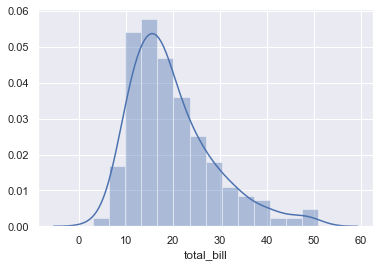

In [4]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot):

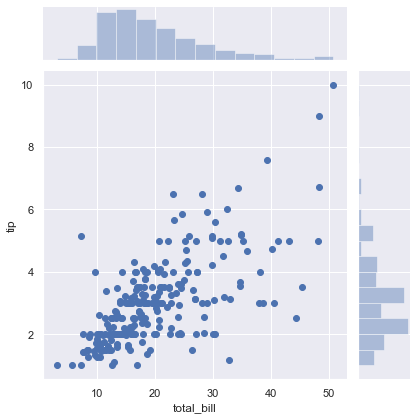

In [5]:
sns.jointplot(x='total_bill', y='tip', data=df)

Характер **представления информации** в центральной части графика можно регулировать с помощью параметра **kind**. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

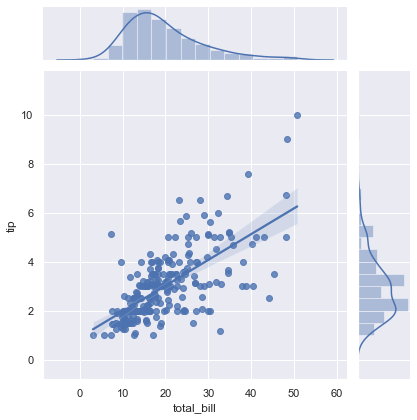

In [6]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot):

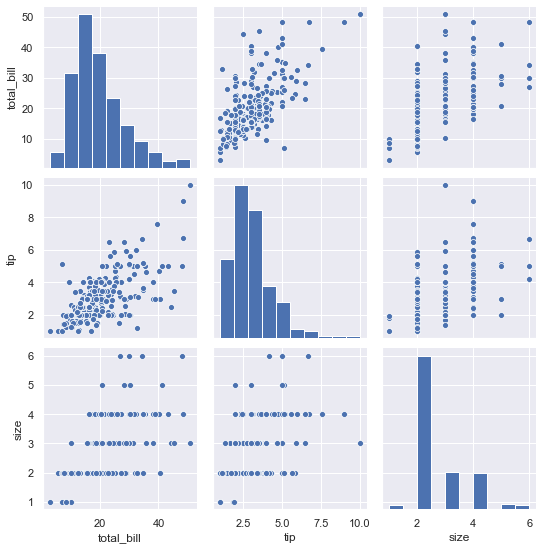

In [7]:
sns.pairplot(df)

Построение графиков, на каждом из которых разными цветами выделяются данные о курящих и некурящих:

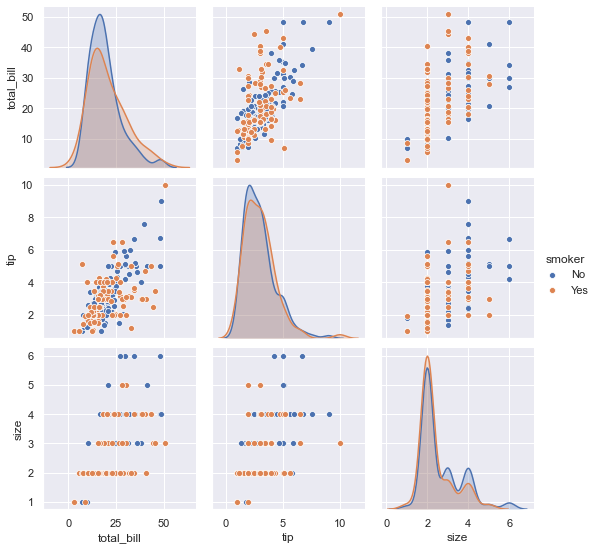

In [8]:
sns.pairplot(df, hue = 'smoker')

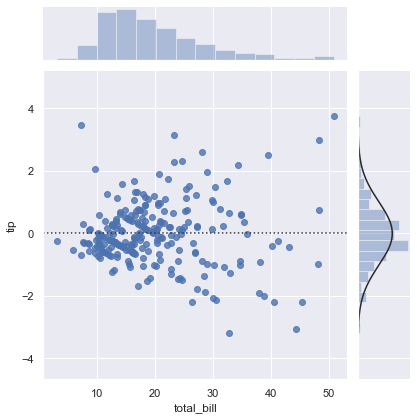

In [9]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='resid')

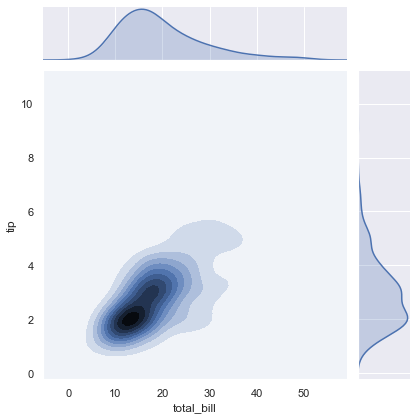

In [10]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='kde')

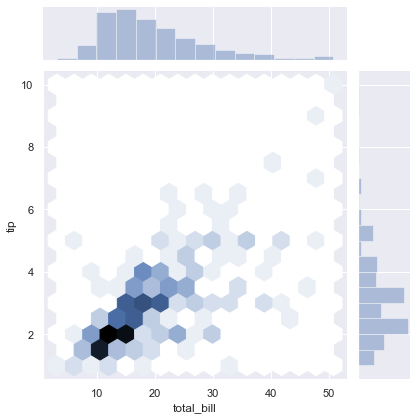

In [11]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex')

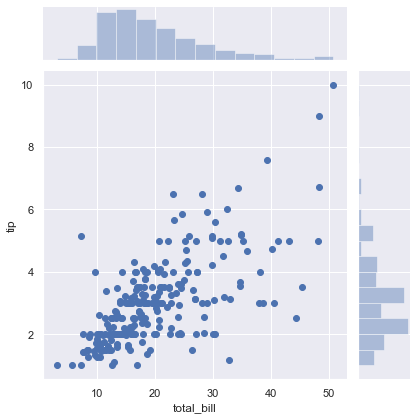

In [12]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='scatter')

## Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом **countplot**:

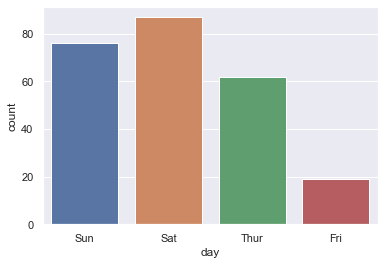

In [13]:
sns.countplot(x='day', data=df)

**Категориальные значения** при построении графиков можно использовать в качестве одного из параметров метода **barplot**. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

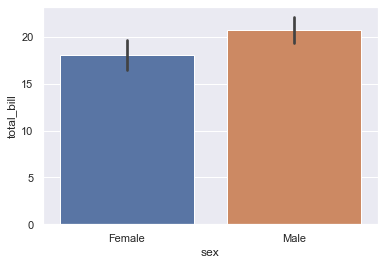

In [14]:
sns.barplot(x='sex', y='total_bill', data=df)

График показывает, что средний чек, оплаченный клиентами-мужчинами, немного больше, чем средний чек клиентов женского пола.

## Boxplots
**Box plot** — тип графика, компонентами которого являются:

- **Отрезок** (Range), отражающий диапазон значений набора данных.
- **Прямоугольник** (Box), который отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал.
- **Усы** (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквантильный диапазон) — ширина прямоугольника от Q1 до Q3.
- **Выбросы** (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.

![boxplots](./../../data/boxplots1.png)

Для создания графиков такого типа в Seaborn используется метод **boxplot**. Он позволяет отобразить распределение заданного количественного признака по категориям, которые определяются значением заданного качественного признака. На диаграмме ниже показывается, как менялась сумма чаевых в зависимости от дня недели:

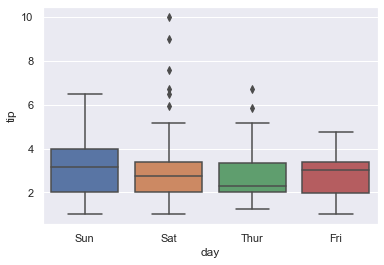

In [15]:
sns.boxplot(x='day', y='tip', data=df)

Ещё один способ увеличения информативности методов Seaborn — использование параметра **hue**. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение **boxplot** при добавлении параметра **hue**:

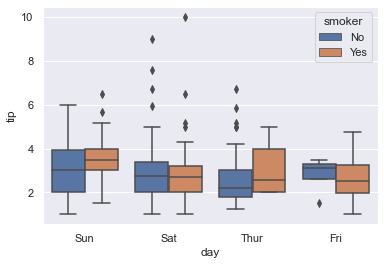

In [16]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

Такой способ представления информации позволяет нам увидеть, как изменялось распределение сумм чаевых в разные дни недели в зонах для курящих и некурящих гостей ресторана.

## Графики табличного типа

Степень связи между двумя величинами в Seaborn помогает оценить **корреляционный анализ**. Величина степени связи (**коэффициент корреляции**) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются **тепловые карты** ([heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода **corr()**. Результат вычислений сохраним в новом датафрейме **correlation**:

In [17]:
correlation = df.corr()

In [18]:
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода **heatmap**. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр **annot**=True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитру **coolwarm** (параметр cmap):

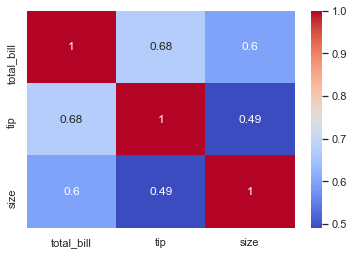

In [19]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Опираясь на результаты корреляционного анализа датафрейма tips.scv, укажите пару признаков, между которыми выявлена самая тесная связь:
- Сумма чека и количество гостей
- **Сумма чека и размер чаевых верно**
- Размер чаевых и количество гостей